<a href="https://colab.research.google.com/github/Fabio313/Aulas_Faculdade_IA/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Função para construir o gerador (G)
def build_generator():
    model = Sequential([
        # Camada densa com 16 neurônios e ativação ReLU. O gerador recebe um número (input_dim=1)
        layers.Dense(16, activation='relu', input_dim=1),
        # Camada de saída que gera um número (output de 1)
        layers.Dense(1)
    ])
    return model

# Função para construir o discriminador (D)
def build_discriminator():
    model = Sequential([
        # Camada densa com 16 neurônios e ativação ReLU. O discriminador recebe um número (input_dim=1)
        layers.Dense(16, activation='relu', input_dim=1),
        # Camada de saída com ativação sigmoid (output é a probabilidade entre 0 e 1 de o dado ser real ou falso)
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Criando as instâncias do gerador e do discriminador
generator = build_generator()
discriminator = build_discriminator()

# Compilando o discriminador. Ele usa 'adam' como otimizador e 'binary_crossentropy' como função de perda.
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# Conectando o gerador ao discriminador para formar a GAN
discriminator.trainable = False  # Congela o discriminador enquanto o gerador é treinado
gan = Sequential([generator, discriminator])  # A GAN é a combinação do gerador e do discriminador
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Dados reais (números reais)
real_data = np.array([[6.0], [7.0], [8.0]])
labels_real = np.ones((3, 1))  # Rótulos para os dados reais (1)
labels_fake = np.zeros((3, 1)) # Rótulos para os dados falsos (0)

# Definindo o número de épocas e o tamanho do lote
epochs = 10
batch_size = 3

# Loop de treinamento da GAN
for epoch in range(epochs):
    # Geração de dados falsos a partir do ruído (números aleatórios)
    noise = np.random.normal(0, 1, (batch_size, 1))
    generated_data = generator.predict(noise)  # Gerando dados falsos com o gerador

    # Treinamento do discriminador com dados reais e falsos
    d_loss_real = discriminator.train_on_batch(real_data, labels_real)  # Treina com dados reais
    d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)  # Treina com dados falsos

    # Treinamento do gerador (para enganar o discriminador)
    noise = np.random.normal(0, 1, (batch_size, 1))  # Gerando mais ruído
    gan_loss = gan.train_on_batch(noise, labels_real)  # O objetivo do gerador é fazer o discriminador classificar os dados gerados como reais

    # A cada 100 épocas, imprime as perdas
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss D Real: {d_loss_real}, Loss D Fake: {d_loss_fake}, Loss G: {gan_loss}")

# Gerando novos números falsos após o treinamento
noise = np.random.normal(0, 1, (5, 1))  # Gera ruído aleatório
generated_numbers = generator.predict(noise)  # Gera novos números falsos
print("Números gerados:", generated_numbers)  # Exibe os números gerados


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Epoch 0, Loss D Real: 0.8984024524688721, Loss D Fake: 0.8038907647132874, Loss G: [array(0.80389076, dtype=float32), array(0.80389076, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Números gerados: [[-0.15993941]
 [-0.14861834]
 [-0.17824458]
 [-0.13094395]
 [-0.31208533]]


In [ ]:
Neste exemplo, usaremos o conjunto de dados MNIST, que contém imagens de dígitos manuscritos, para treinar a GAN a gerar imagens semelhantes.

Passos do Código:
Construir o Gerador e o Discriminador.
Definir o Modelo GAN.
Treinar a GAN.
Gerar e Visualizar Imagens.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
Epoch 0, D Loss Real: 0.7879135608673096, D Loss Fake: 0.7246990203857422, G Loss: [array(0.724699, dtype=float32), array(0.724699, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


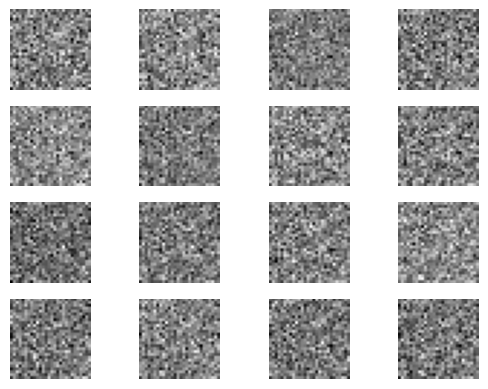

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.datasets import mnist

# Carregar o conjunto de dados MNIST (imagens de dígitos escritos à mão)
(x_train, _), (_, _) = mnist.load_data()
x_train = (x_train - 127.5) / 127.5  # Normalizar os dados para o intervalo [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)  # Adicionar a dimensão do canal (necessário para as camadas de convolução)

# Parâmetros do treinamento
batch_size = 64
epochs = 100  # Quantidade de épocas para treinamento
latent_dim = 100  # Dimensão do vetor de entrada (ruído) para o gerador

# Função para construir o Gerador
def build_generator():
    model = Sequential([
        # Primeira camada totalmente conectada, input_dim define o tamanho do vetor de ruído (100)
        layers.Dense(256, activation='relu', input_dim=latent_dim),
        layers.BatchNormalization(),  # Normalização para estabilizar o treinamento
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        # Camada de saída, 28x28x1 pixels, ativação 'tanh' para gerar valores no intervalo [-1, 1]
        layers.Dense(28 * 28 * 1, activation='tanh'),
        layers.Reshape((28, 28, 1))  # Redimensiona a saída para uma imagem de 28x28 com 1 canal (preto e branco)
    ])
    return model

# Função para construir o Discriminador
def build_discriminator():
    model = Sequential([
        # Camada de entrada recebe imagens 28x28x1 e as achata em um vetor 1D
        layers.Flatten(input_shape=(28, 28, 1)),
        # Camadas densas (fully connected) para processar a imagem
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        # Camada de saída com ativação sigmoid para classificar como real (1) ou falso (0)
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Função para construir o GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Congela o discriminador durante o treinamento do gerador
    model = Sequential([generator, discriminator])  # O GAN é a combinação do gerador e do discriminador
    return model

# Instanciar o Gerador e o Discriminador
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')  # Compila o discriminador

# Instanciar o GAN combinando o gerador e o discriminador
gan = build_gan(generator, discriminator)
gan.compile(optimizer='adam', loss='binary_crossentropy')  # Compila o GAN

# Treinar a GAN
for epoch in range(epochs):
    # Selecionar um lote aleatório de imagens reais do conjunto de treinamento
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]  # Pega imagens reais aleatórias
    real_labels = np.ones((batch_size, 1))  # Rótulos para as imagens reais são 1 (verdadeiro)

    # Gerar imagens falsas (usando o gerador) a partir de ruído aleatório
    noise = np.random.normal(0, 1, (batch_size, latent_dim))  # Vetor de ruído
    fake_images = generator.predict(noise)  # Gerar imagens falsas com o gerador
    fake_labels = np.zeros((batch_size, 1))  # Rótulos para imagens falsas são 0 (falso)

    # Treinar o discriminador com imagens reais e falsas
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)  # Treina com imagens reais
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)  # Treina com imagens falsas

    # Treinar o gerador (através do GAN) para enganar o discriminador
    noise = np.random.normal(0, 1, (batch_size, latent_dim))  # Gera novo ruído
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))  # O gerador tenta enganar o discriminador, então o rótulo é 1 (verdadeiro)

    # A cada 1000 épocas, imprime as perdas e gera imagens para visualização
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, D Loss Real: {d_loss_real}, D Loss Fake: {d_loss_fake}, G Loss: {g_loss}")

        # Gerar e visualizar 16 imagens falsas
        noise = np.random.normal(0, 1, (16, latent_dim))  # Vetor de ruído para gerar imagens
        generated_images = generator.predict(noise)  # Gerar as imagens falsas
        generated_images = (generated_images + 1) / 2.0  # Reverter a normalização de [-1, 1] para [0, 1]

        # Criar um grid 4x4 de imagens geradas
        fig, axs = plt.subplots(4, 4)
        cnt = 0
        for i in range(4):
            for j in range(4):
                axs[i, j].imshow(generated_images[cnt, :, :, 0], cmap='gray')  # Exibe a imagem gerada
                axs[i, j].axis('off')  # Desabilita os eixos
                cnt += 1
        plt.show()  # Mostra as imagens geradas
